All authors confirm that they contributed equally to the project report and
were involved in the implementation and evaluation to the same extent.

In [1]:
import pandas as pd
from sklearn_extra.cluster import KMedoids
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial import distance
import streamlit as st

In [2]:
def make_the_clusters(n_clusters, data, distance, metric):
  # if metric == 'supremumnorm':
  #   metric=supremumnorm
  if metric == 'minkowskinorm':
    metric=minkowskinorm
  kmedoids = KMedoids(n_clusters=n_clusters,metric=metric, random_state=0,method="pam").fit(data)
  labels = kmedoids.labels_
#  kmedoids.cluster_centers_
#  kmedoids.inertia_
  return labels

In [3]:
"""Die Funktion nimmt ein Datenset (n_samples x n_features) entgegen und returned eine Datenset (n_samples x n_samples) 
das jeweils die Abstände der durch uns zu implemtirenden abstansfunktion berechnet.
Diese Matrix kann dann mit metric=precomputed an Kmoids übergeben werden"""
def make_the_distance_matrix(dataset):
  pass

In [4]:
def make_the_picture(n_clusters, labels, data, reduction_method, metric, dataset_name):
  #alpha passt sich dynamisch an, je größer datenset desto niedriger alpha
  alpha = 1.2**(-1*(len(data)/1000))

  if reduction_method == 'TSNE':
    perplexity=n_clusters
    reduced_data = TSNE(n_components=2,perplexity=n_clusters, random_state=42).fit_transform(data['X'])

  elif reduction_method == 'PCA':
    reduced_data = PCA(n_components=2).fit_transform(data['X'])

  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7.5))
  fig.suptitle('Output Clustering projected with {} for dataset {}'.format(reduction_method,dataset_name))
  ax1.scatter(reduced_data[:,0],reduced_data[:,1], c=labels,alpha=alpha)
  ax2.scatter(reduced_data[:,0],reduced_data[:,1], c=data['y'],alpha=alpha)

  ax1.title.set_text('Clusters from KMedoids with metric {}'.format(metric))
  ax2.title.set_text('Real Clusters')


In [5]:
def supremumnorm(x,y):
  return max(abs(x-y))

def minkowskinorm(x,y):
  return distance.minkowski(x, y, 5)

In [6]:
def prepare_the_dataset(df, dataset_name, categorical_variables):

  df[categorical_variables[dataset_name]['target']] = pd.factorize(df[categorical_variables[dataset_name]['target']])[0]
  if len(categorical_variables[dataset_name]['features']) > 0:
    df = pd.merge(df.drop(columns=categorical_variables[dataset_name]['features']), pd.get_dummies(df[categorical_variables[dataset_name]['features']]), left_index=True, right_index=True)

  for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())

  dataset = {'X':df.drop(columns=categorical_variables[dataset_name]['target']).to_numpy(), 'y':df[categorical_variables[dataset_name]['target']]}

  return dataset

### Dataset names

In [7]:
dataset_name = ['penguins', 'banknote_authentication', 'iris', 'winequality']

In [8]:
df = [pd.read_csv('samplee_data/penguins.csv'), 
    pd.read_csv('samplee_data/data_banknote_authentication.txt', names=['fetaure_1', 'fetaure_2', 'fetaure_3', 'fetaure_4', 'target']), 
    pd.read_csv('samplee_data/iris.data'), 
    pd.read_csv('samplee_data/winequality-white.csv', sep=';')]

In [9]:
metric_list = ["euclidean", "cosine", "manhattan", "minkowskinorm"]

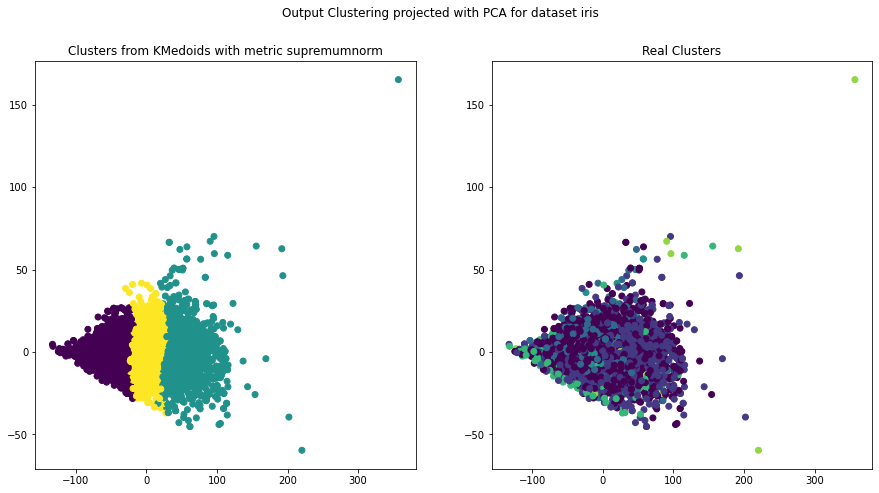

In [13]:
categorical_variables = {'penguins': {'target': 'species',
                                      'features':['island',
                                                  'sex']},
                         'winequality': {'target': 'quality',
                                      'features':[]},
                         'iris': {'target': 'Iris-setosa',
                                      'features':[]},
                         'banknote_authentication': {'target': 'target',
                                      'features':[]}}

#variablen
n_clusters = 3
reduction_method = 'TSNE' #TSNE oder PCA
# metric = "supremumnorm" #euclidean, cosine, manhattan, supremumnorm

#df = pd.read_csv('samplee_data/penguins.csv')
#df = pd.read_csv('samplee_data/data_banknote_authentication.txt', names=['fetaure_1', 'fetaure_2', 'fetaure_3', 'fetaure_4', 'target'])
#df = pd.read_csv('samplee_data/iris.data')
#df = pd.read_csv('samplee_data/winequality-white.csv', sep=';')

dataset = prepare_the_dataset(df[2], dataset_name[2], categorical_variables)

labels = make_the_clusters(n_clusters,dataset['X'], None, metric_list[3])
make_the_picture(n_clusters, labels, dataset, reduction_method, metric_list[3], dataset_name[2])

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
